<a href="https://colab.research.google.com/github/David-Gentil/Prev_Inv_MKT/blob/main/Prev_Inv_MKT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CONTEXTO INTRODUÇÃO**

Uma empresa está investindo mensalmente em plataformas de publicidade online, como Youtube, Facebook e newspaper, para a prospecção de leads (pessoas interessadas em seus produtos). A fim de acompanhar o desempenho desses investimentos, a empresa registra todos os gastos com publicidade e todos os retornos de vendas gerados a partir desses investimentos.

Para **entender** melhor **a relação entre as variáveis** presentes nesses registros e **identificar os fatores que mais impactam** na geração de leads, a empresa solicitou a análise de um especialista em dados. **Além disso, a empresa busca criar um modelo de predição** de valores para estimar o retorno de vendas que pode ser gerado a partir de um determinado investimento em publicidade.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#IMPORTAÇÃO DAS BIBLIOTECAS

In [ ]:
#Instalando bibliotecas
!pip install scikit-learn==1.2.2
%pip install plotly
%pip install cufflinks
%pip install chart-studio

In [ ]:
#Importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from xgboost import XGBRegressor

import plotly.express as px


#ANÁLISE DESCRITIVA

##Análise inicial da base de dados

In [ ]:
#Carregando base de dados

Base_MKT = pd.read_csv("MKT.csv")

In [ ]:
#Lendo os dados

Base_MKT.head().reset_index()

,index,youtube,facebook,newspaper,sales
0,0,84.72,19.20,48.96,12.60
1,1,351.48,33.96,51.84,25.68
2,2,135.48,20.88,46.32,14.28
3,3,116.64,1.80,36.00,11.52
4,4,318.72,24.00,0.36,20.88


In [ ]:
#Coletando as informações

Base_MKT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


### Analise desse passo
* Não encontramos dados nulos nas colunas da base de dados;
* Não temos variáveis não numéricas, portanto não precisamos transformar em booleanas para usar mmo modelo;
* As colunas do arquivo, a princípio são relevantes, não necessitando de exclusão.

In [ ]:
# Carregando a descrição dos dados

Base_MKT.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


##Análise gráfica dos dados

In [ ]:
#Plotando o gráfico boxplot da variável "youtube"

fig1 = px.box(Base_MKT, x="youtube")
fig1.update_layout(title_text='Boxplot youtube')
fig1.update_traces(line_color="purple")
fig1.show()

In [ ]:
#Plotando o gráfico boxplot da variável "facebook"

fig1 = px.box(Base_MKT, x="facebook")
fig1.update_layout(title_text='Boxplot facebook')
fig1.update_traces(line_color="purple")
fig1.show()

In [ ]:
#Plotando o gráfico boxplot da variável "newspaper"

fig1 = px.box(Base_MKT, x="newspaper")
fig1.update_layout(title_text='Boxplot newspaper')
fig1.update_traces(line_color="purple")
fig1.show()

In [ ]:
#Plotando o gráfico boxplot da variável "Sales"

fig1 = px.box(Base_MKT, x="sales")
fig1.update_layout(title_text='Boxplot Sales')
fig1.update_traces(line_color="purple")
fig1.show()

### Análise desse passo

* Notamos que apenas para vairiável "newspaper" encontramos valores fora do máximos (121.08 > 107.28);
* Demais variáveis, com os valores dentro dos limites de tolerância mínimo e máximo.

#ANÁLISE EXPLORATÓRIA

##Análise entre multivariáveis (Pair Plot)

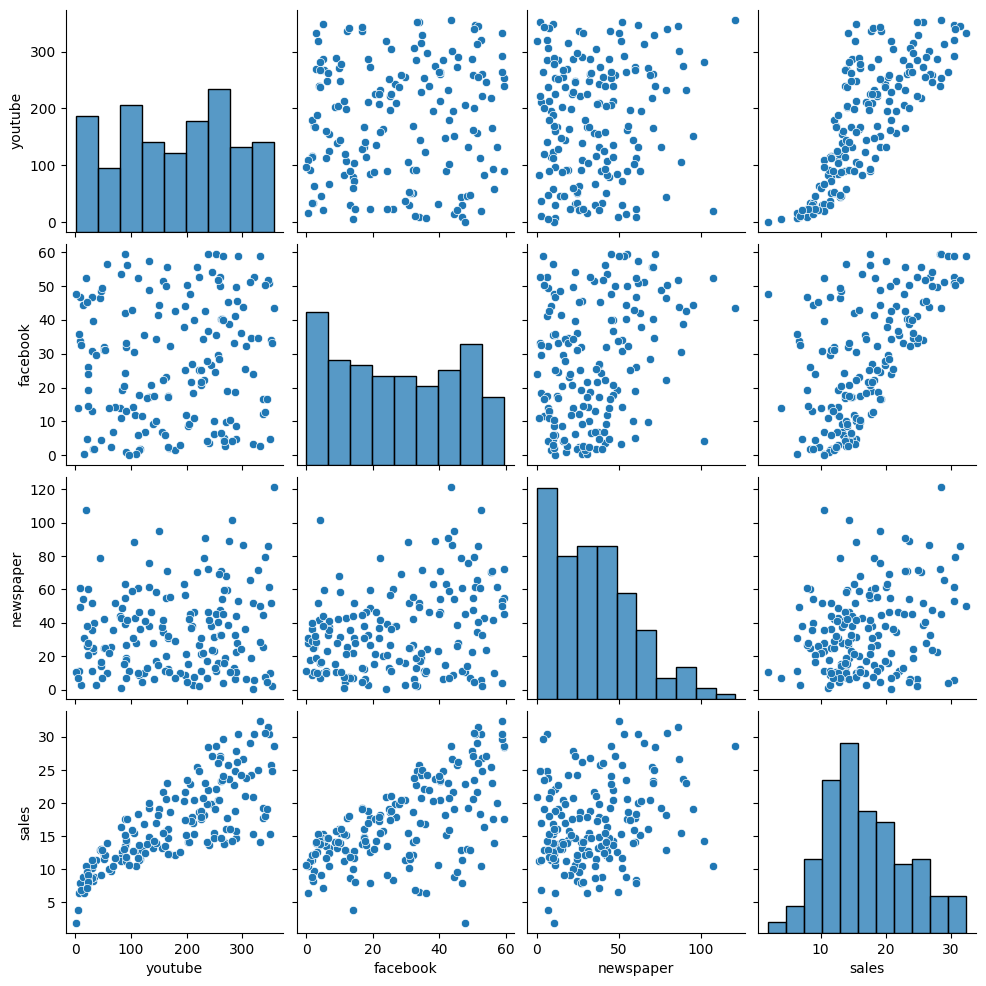

In [ ]:
# Plotando gráfico de análise entre multivariáveis (Pair Plot)

sns.pairplot(Base_MKT);

In [ ]:
#Notamos que as variáveis que estão mais relacionadas são:

#Youtube x Sales
#Facebook x Sales

#A variável "newspaper" apresenta uma distribuição de dispersão de relação mais independente das demais,
#portanto vamos desconsiderar, inicialmente, os seus dados para as predições.

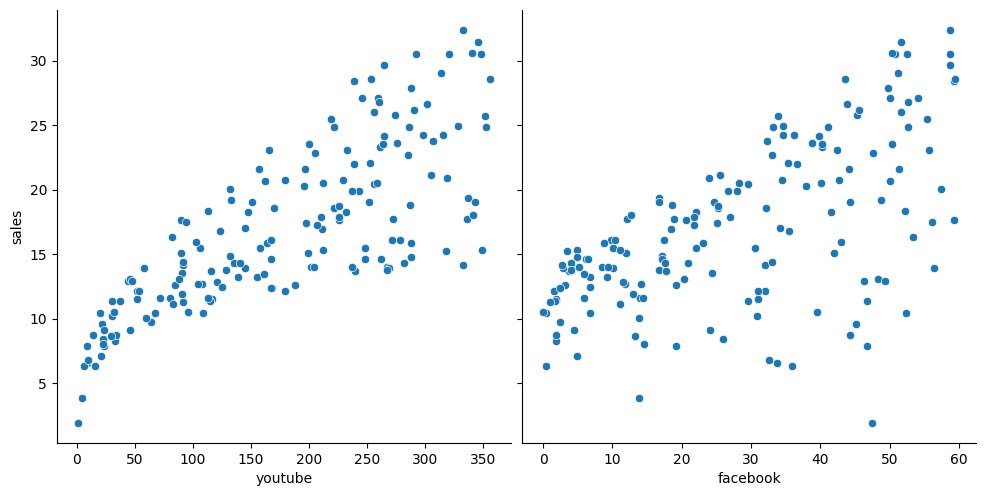

In [ ]:
# Plotando Pair Plot das variáveis com maior relação

sns.pairplot(Base_MKT, x_vars=['youtube', 'facebook'], y_vars='sales', height=5, aspect=1, kind='scatter');

##Análise de correspondência

In [ ]:
#Analisando dados de correspondência

Base_MKT.corr().reset_index()

,index,youtube,facebook,newspaper,sales
0,youtube,1.000000,0.086538,0.110759,0.782030
1,facebook,0.086538,1.000000,0.293425,0.602918
2,newspaper,0.110759,0.293425,1.000000,0.254987
3,sales,0.782030,0.602918,0.254987,1.000000


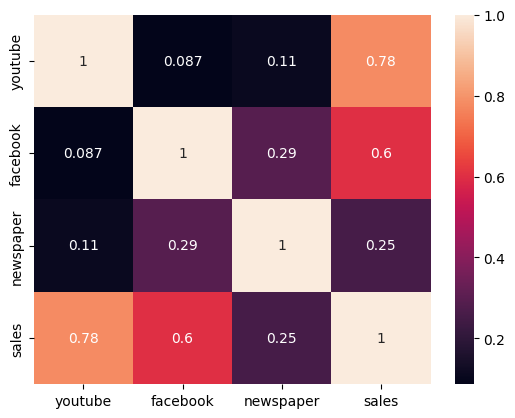

In [ ]:
#Plotando Heat Map

sns.heatmap(Base_MKT.corr(), annot=True);

In [ ]:
#Confirmamos a correspondência da relação entre as variáveis, vistas no Pair Plot
#As variável mais realcionadas com "Sales", são "Youtube" e "Facebook"

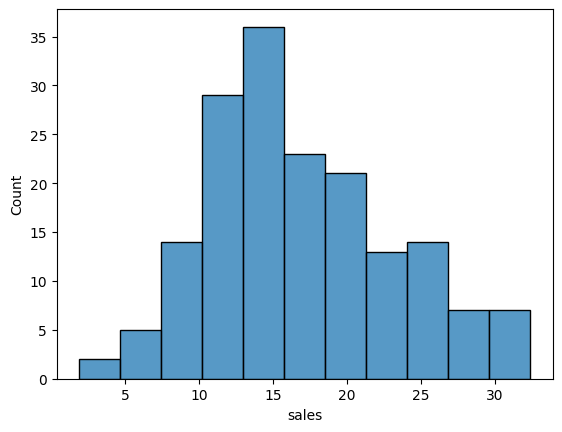

In [ ]:
#Plotando o Histograma da variável "Sales"

sns.histplot(Base_MKT['sales']);

#MODELAGEM

##TÉCNICAS DE MODELAGEM



1.   Regressão linear do Sklearn
<https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression>

2.   Support Vector Regression do Sklearn
<https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR>

3.   Tree Methods do xgboost
<https://xgboost.readthedocs.io/en/stable/treemethod.html>

Modeling assumptions:

Apenas variáveis numéricas

##TEST DESING



##Data Set Split:
Separação de train / test padrão com porcentagem de 30% para test do Sklearn

##Métrica de avaliação do modelo:

Validação da métrica de r2_score que epresenta a proporção da variância (de y) que foi explicada pelas variáveis independentes no modelo. Utilizando o método do Sklearn
<https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score>

In [ ]:
#Definindo as variáveis do modelo

X = Base_MKT[['youtube', 'facebook']]
y = Base_MKT['sales']

In [ ]:
#Configurando o modelo (Variáveis de teste, de treino e tamanho do teste )

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##TÉCNICA 1. REGRESSÃO LINEAR

In [ ]:
#Treinando o modelo
RegLinear = LinearRegression().fit(X_train, y_train)

0.8824796927714542


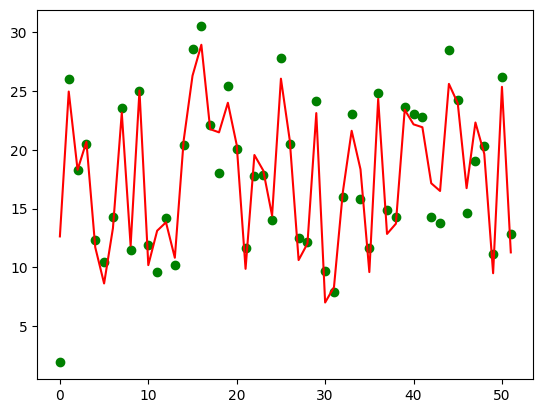

In [ ]:
#Testando o modelo
y_pred = RegLinear.predict(X_test)

#Calculnado R2
print(r2_score(y_test, y_pred))

#Plotando y_test x y_pred
pred = [i for i in range(len(y_test))]
fig = plt.figure()
plt.scatter(pred, y_test, color = "green")
plt.plot(pred, y_pred, color = "red")
plt.show()

##TÉCNICA 2. SVR

In [ ]:
#Treinando o modelo
RegSVR = SVR().fit(X_train, y_train)

0.7706919466052706


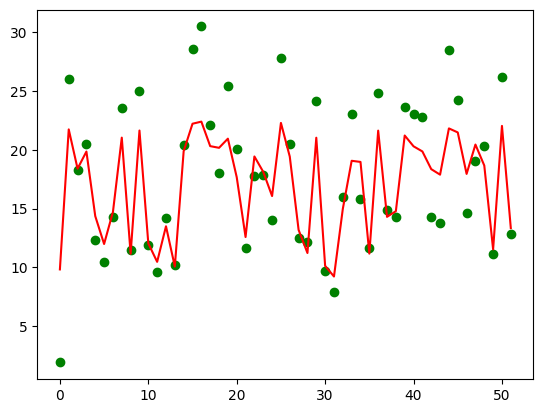

In [ ]:
#Testando o modelo
y_pred = RegSVR.predict(X_test)

#Calculnado R2
print(r2_score(y_test, y_pred))

#Plotando y_test x y_pred
pred = [i for i in range(len(y_test))]
fig = plt.figure()
plt.scatter(pred, y_test, color = "green")
plt.plot(pred, y_pred, color = "red")
plt.show()

##TÉCNICA 3. DECISION TREE METHODS DO XGBOOST

In [ ]:
#Treinando o modelo
RegXGB = XGBRegressor().fit(X_train, y_train)

0.968207139433767


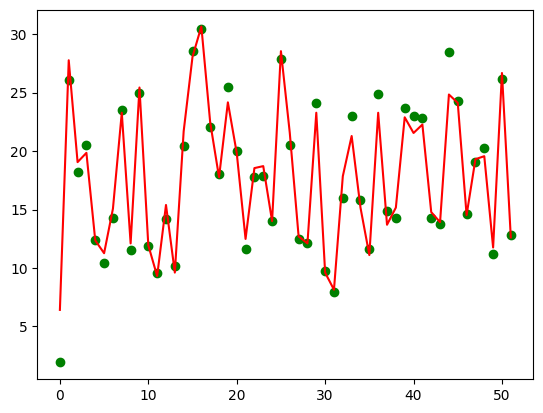

In [ ]:
#Testando o modelo
y_pred = RegXGB.predict(X_test)

#Calculnado R2
print(r2_score(y_test, y_pred))

#Plotando y_test x y_pred
pred = [i for i in range(len(y_test))]
fig = plt.figure()
plt.scatter(pred, y_test, color = "green")
plt.plot(pred, y_pred, color = "red")
plt.show()

##CONCLUSÃO DOS RESULTADOS DAS TÉCNICAS

###Conforme observado o R2 do XGB obteve a menor variação de erro, comprovado pela análise gráfica, sendo o mais inidicado para esse caso.

##OTIMIZAÇÃO DE HIIPERPARÂMETROS DO MODELO SELECIONADO

Utilizando o método GridSearch CV do Sklearn

In [ ]:
#Verificando parâmetros da técncica selecionada
RegXGB.get_params().keys()

#https://xgboost.readthedocs.io/en/stable/parameter.html#parameters-for-tree-booster

dict_keys(['objective', 'base_score', 'booster', 'callbacks', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'device', 'early_stopping_rounds', 'enable_categorical', 'eval_metric', 'feature_types', 'gamma', 'grow_policy', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_bin', 'max_cat_threshold', 'max_cat_to_onehot', 'max_delta_step', 'max_depth', 'max_leaves', 'min_child_weight', 'missing', 'monotone_constraints', 'multi_strategy', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'random_state', 'reg_alpha', 'reg_lambda', 'sampling_method', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [ ]:
#Ajustando os parâmetros
parameters = {'max_depth': [4],
             'learning_rate': [0.2],
              'objective': ['reg:squarederror'],
              'booster': ['gbtree'],
              'n_jobs': [5],
              'gamma': [0],
              'min_child_weight': [1],
              'max_delta_step': [0],
              'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]
              }

In [ ]:
#Carregando o GridSearch

XGBGrid = GridSearchCV(XGBRegressor(), parameters, refit= 'r2', verbose=True)

In [ ]:
#Treinando o modelo

XGBGridModel = XGBGrid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [ ]:
#Encontrando os melhores parâmetros dos selecionados

XGBGridModel.best_params_

{'booster': 'gbtree',
 'gamma': 0,
 'learning_rate': 0.2,
 'max_delta_step': 0,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_jobs': 5,
 'objective': 'reg:squarederror',
 'subsample': 0.5}

0.980494170330722


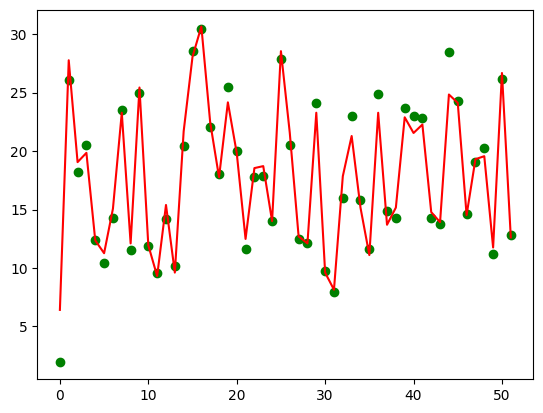

In [ ]:
#Testando o modelo
yGrid = XGBGridModel.predict(X_test)

#Calculnado R2
print(r2_score(y_test, yGrid))

#Plotando y_test x y_pred
pred = [i for i in range(len(y_test))]
fig = plt.figure()
plt.scatter(pred, y_test, color = "green")
plt.plot(pred, y_pred, color = "red")
plt.show()

##CONCLUSÃO DA MODELAGEM

###Notamos que conseguimos melhorar ainda mais a performance do modelo, após a otimização dos seus hiperparâmetros.

#CALCULANDO A PREDIÇÃO

###Após a modelagem, iremos fazer algumas previsões para avaliar o impacto do investimento nas vendas, uxiliando na tomada de decisões e na definição de estratégias de negócio.

In [ ]:
#Descrevendo dados para encontrar algumas valores conhecidos
Base_MKT.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
#Calculando utilizando as médias conhecidas
youtube = 178.021053
facebook = 27.671579
Dados = [[youtube, facebook]]
predi = RegXGB.predict(Dados)
print(predi)

[17.03252]


### Análise desse passo

* Notamos que o valor da predição é muito próximo ao valor conhecido e dentro da nossa margem de precisão,
* portanto nosso modelo atende as expectativas

In [ ]:
#Simulando a previsão de investimento de 1000 no Youtube

youtube = 1000
facebook = 0
Dados = [[youtube, facebook]]
predi = RegXGB.predict(Dados)
print(predi)

[14.566979]


In [ ]:
#Simulando a previsão de investimento de 1000 no Facebook

youtube = 0
facebook = 1000
Dados = [[youtube, facebook]]
predi = RegXGB.predict(Dados)
print(predi)

[6.6822314]


In [ ]:
#simulando a previsão de investimento de 500 no Youtube e 500 no Facebook

youtube = 500
facebook = 500
Dados = [[youtube, facebook]]
predi = RegXGB.predict(Dados)
print(predi)

[32.400402]


In [ ]:
#Calculando previsão através de dados fornecidos pelo usuário

youtube = float(input("Digite o valor investido em Youtube: "))
facebook = float(input("Digite o valor investido em Facebook: "))
Dados = [[youtube, facebook]]
predi = RegXGB.predict(Dados)
print(predi)

#Com esse código o usuário poderá simular qualquer valor e encontrará a previsão do retorno, conforme modelo

Digite o valor investido em Youtube: 200
Digite o valor investido em Facebook: 800
[24.394073]


##CONCLUSÃO DO CÁLCULO DE PREDIÇÃO

Como vimos, com esse modelo podemo simular vários cenários, auxiliando a melhor tomada de decisão sobre o investimento em marketing para o negócio em questão.